# Batch Train

prodigy batch_train_custom_increment baseline_dataset_2000 --n-iter 10 --factor 1 --batch-size 10 --eval-id unique_eval --gpu-id 0 -F textcat_al.py > baseline_increment.out

prodigy batch_train_custom_cumulate baseline_dataset_2000 --n-iter 10 --factor 1 --batch-size 10 --eval-id unique_eval --gpu-id 0 -F textcat_al.py > baseline_cumulate.out

prodigy batch_train_custom_increment custom_vector_experiment --n-iter 10 --factor 1 --batch-size 10 --eval-id unique_eval --gpu-id 0 -F textcat_al.py > custom_increment.out

prodigy batch_train_custom_cumulate custom_vector_experiment --n-iter 10 --factor 1 --batch-size 10 --eval-id unique_eval --gpu-id 0 -F textcat_al.py > custom_cumulate.out

prodigy batch_train_custom_increment baseline_dataset_2000 --n-iter 1 --factor 1 --batch-size 10 --eval-id unique_eval --gpu-id 0 -F textcat_al.py > baseline_increment_one_pass.out

prodigy batch_train_custom_increment custom_vector_experiment --n-iter 1 --factor 1 --batch-size 10 --eval-id unique_eval --gpu-id 0 -F textcat_al.py > custom_increment_one_pass.out

prodigy batch_train_custom_increment default_vector_experiment --n-iter 1 --factor 1 --batch-size 10 --eval-id unique_eval --gpu-id 0 -F textcat_al.py > default_increment_one_pass.out

prodigy batch_train_custom_increment baseline_dataset_2000 --n-iter 1 --factor 1 --batch-size 32 --eval-id unique_eval --gpu-id 0 -F textcat_al.py > baseline_increment_one_pass_32.out

prodigy batch_train_custom_increment baseline_dataset_2000 --n-iter 1 --factor 1 --batch-size 32 --eval-id unique_eval --gpu-id 0 -F textcat_al.py > baseline_increment_one_pass_pretrained_32.out

prodigy batch_train_custom_increment custom_vector_experiment --n-iter 1 --factor 1 --batch-size 32 --eval-id unique_eval --gpu-id 0 -F textcat_al.py > custom_increment_one_pass_32.out

prodigy batch_train_custom_increment baseline_dataset_2000 --n-iter 1 --factor 1 --batch-size 10 --eval-id unique_eval --gpu-id 0 -F textcat_al.py > baseline_increment_one_pass_pretrained.out

#change learning rate to 0.0001 plus _lr
prodigy batch_train_custom_increment baseline_dataset_2000 --n-iter 1 --factor 1 --batch-size 10 --eval-id unique_eval --gpu-id 0 -F textcat_al.py > baseline_increment_one_pass_pretrained_lr.out

prodigy batch_train_custom_increment baseline_dataset_2000 --n-iter 1 --factor 1 --batch-size 32 --eval-id unique_eval --gpu-id 0 -F textcat_al.py > baseline_increment_one_pass_pretrained_lr_32.out

# Draw curves

In [2]:
from prodigy.components.loaders import JSONL
import numpy as np
import json
import matplotlib.pyplot as plt
import cProfile

/usr/lib64/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [3]:
increment_path = "baseline_increment.out"
def data_extract(increment_path):
    increment_result = []
    with open(increment_path) as f:
        for line in f:
            if line.startswith("Time"):
                line_list = [i.split(":")[-1].split(" s")[0].split("/")[0].split("\n")[0].split("[")[-1] for i in line.split(",")]
                increment_result.append(line_list)
    return increment_result

In [4]:
# Time. Batch. Epoch. Step. Loss. Acc
increment_baseline = np.array(data_extract("baseline_increment.out"),dtype=float)
increment_experiment = np.array(data_extract("custom_increment.out"),dtype=float)

Text(0,0.5,'accuracy')

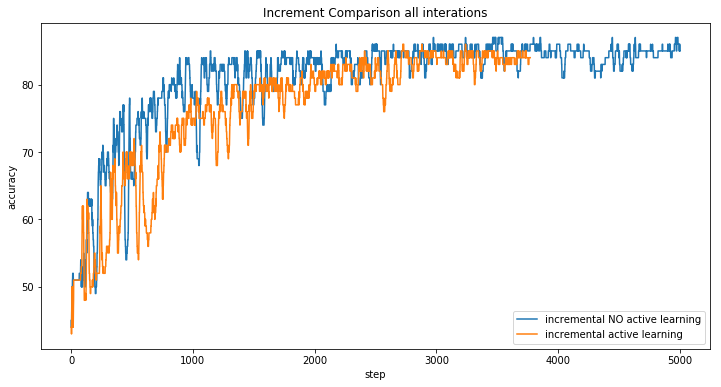

In [5]:
fig = plt.figure(figsize=(12,6))
plt.plot(increment_baseline[:,3],increment_baseline[:,-1],label = "incremental NO active learning")
plt.plot(increment_experiment[:,3],increment_experiment[:,-1], label = "incremental active learning")
plt.legend()
plt.title("Increment Comparison all interations")
plt.xlabel("step")
plt.ylabel("accuracy")

Text(0,0.5,'accuracy')

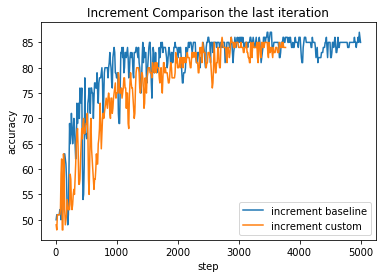

In [9]:
increment_baseline1=increment_baseline.reshape((500,10,6))
increment_experiment1=increment_experiment.reshape((377,10,6))

plt.plot(increment_baseline1[:,-1,3],increment_baseline1[:,-1,-1],label = "increment baseline")
plt.plot(increment_experiment1[:,-1,3],increment_experiment1[:,-1,-1], label = "increment custom")
plt.legend()
plt.title("Increment Comparison the last iteration")
plt.xlabel("step")
plt.ylabel("accuracy")

In [6]:
increment_experiment_one_pass = np.array(data_extract("custom_increment_one_pass.out"),dtype=float)
increment_default_one_pass = np.array(data_extract("default_increment_one_pass.out"),dtype=float)
increment_default_one_pass_32 = np.array(data_extract("default_increment_one_pass_32.out"),dtype=float)
increment_default_one_pass_64 = np.array(data_extract("default_increment_one_pass_64.out"),dtype=float)
increment_default_one_pass_128 = np.array(data_extract("default_increment_one_pass_128.out"),dtype=float)

increment_baseline_one_pass = np.array(data_extract("baseline_increment_one_pass.out"),dtype=float)
increment_baseline_one_pass_32 = np.array(data_extract("baseline_increment_one_pass_32.out"),dtype=float)
increment_baseline_one_pass_64 = np.array(data_extract("baseline_increment_one_pass_64.out"),dtype=float)
increment_baseline_one_pass_128 = np.array(data_extract("baseline_increment_one_pass_128.out"),dtype=float)

increment_baseline_one_pass_pretrained = np.array(data_extract("baseline_increment_one_pass_pretrained.out"),dtype=float)
increment_baseline_one_pass_pretrained_32 = np.array(data_extract("baseline_increment_one_pass_pretrained_32.out"),dtype=float)
increment_baseline_one_pass_pretrained_64 = np.array(data_extract("baseline_increment_one_pass_pretrained_64.out"),dtype=float)
increment_baseline_one_pass_pretrained_128 = np.array(data_extract("baseline_increment_one_pass_pretrained_128.out"),dtype=float)

increment_baseline_one_pass_pretrained_lr = np.array(data_extract("baseline_increment_one_pass_pretrained_lr.out"),dtype=float)
increment_baseline_one_pass_pretrained_lr_32 = np.array(data_extract("baseline_increment_one_pass_pretrained_lr_32.out"),dtype=float)


Text(0,0.5,'accuracy')

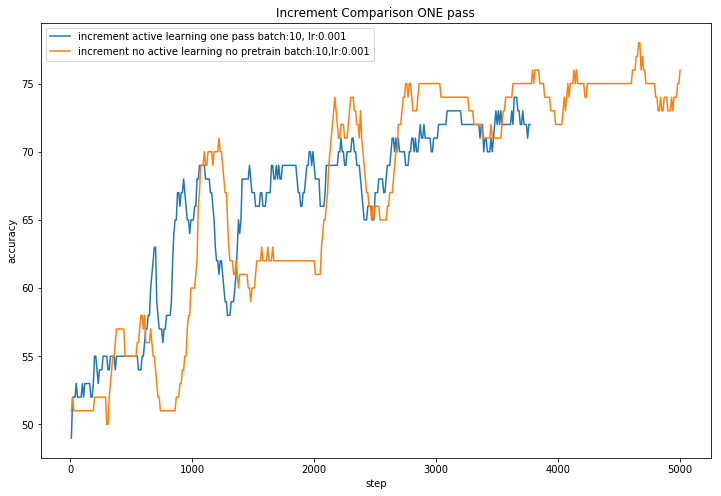

In [7]:
fig = plt.figure(figsize=(12,8))

plt.plot(10*increment_experiment_one_pass[:,1],increment_experiment_one_pass[:,-1], label = "increment active learning one pass batch:10, lr:0.001")
#plt.plot(increment_default_one_pass[:,1],increment_default_one_pass[:,-1], label = "increment default one pass")

plt.plot(10*increment_baseline_one_pass[:,1],increment_baseline_one_pass[:,-1],label = "increment no active learning no pretrain batch:10,lr:0.001")
# plt.plot(32*increment_baseline_one_pass_32[:,1],increment_baseline_one_pass_32[:,-1], label = "increment no active learning no pretrain batch:32,lr:0.001")
# plt.plot(64*increment_baseline_one_pass_64[:,1],increment_baseline_one_pass_64[:,-1], label = "increment no active learning no pretrain batch:64,lr:0.001")
# plt.plot(128*increment_baseline_one_pass_128[:,1],increment_baseline_one_pass_128[:,-1], label = "increment no active learning no pretrain batch:128,lr:0.001")

# plt.plot(10*increment_baseline_one_pass_pretrained[:,1],increment_baseline_one_pass_pretrained[:,-1],label = "increment no active learning pretrained batch:10,lr :0.001")
# plt.plot(32*increment_baseline_one_pass_pretrained_32[:,1],increment_baseline_one_pass_pretrained_32[:,-1], label = "increment no active learning pretrained batch:32,lr:0.001")
# plt.plot(64*increment_baseline_one_pass_pretrained_64[:,1],increment_baseline_one_pass_pretrained_64[:,-1],label = "increment no active learning pretrained batch:64,lr :0.001")
# plt.plot(128*increment_baseline_one_pass_pretrained_128[:,1],increment_baseline_one_pass_pretrained_128[:,-1], label = "increment no active learning pretrained batch:128,lr:0.001")

#plt.plot(10*increment_default_one_pass[:,1],increment_default_one_pass[:,-1],label = "increment active learning default model no pretrain batch:10,lr:0.001")
# plt.plot(32*increment_default_one_pass_32[:,1],increment_default_one_pass_32[:,-1], label = "increment active learning default model no pretrain batch:32,lr:0.001")
#plt.plot(64*increment_default_one_pass_64[:,1],increment_default_one_pass_64[:,-1], label = "increment active learning default model no pretrain batch:64,lr:0.001")
# plt.plot(128*increment_default_one_pass_128[:,1],increment_default_one_pass_128[:,-1], label = "increment active learning default model no pretrain batch:128,lr:0.001")

#plt.plot(10*increment_default_one_pass_pretrained_lr[:,1],increment_default_one_pass_pretrained_lr[:,-1],label = "increment no active learning pretrained batch:10,lr:0.0001")
# plt.plot(32*increment_default_one_pass_pretrained_lr_32[:,1],increment_default_one_pass_pretrained_lr_32[:,-1],label = "increment no active learning pretrained batch:32,lr:0.0001")

plt.legend()
plt.title("Increment Comparison ONE pass")
plt.xlabel("step")
plt.ylabel("accuracy")

In [9]:
cumulate_baseline = np.array(data_extract("baseline_cumulate.out"),dtype=float)
cumulate_experiment = np.array(data_extract("custom_cumulate.out"),dtype=float)

cumulate_baseline=cumulate_baseline.reshape((50,10,5))
cumulate_experiment=cumulate_experiment.reshape((38,10,5))

Text(0.5,0,'step')

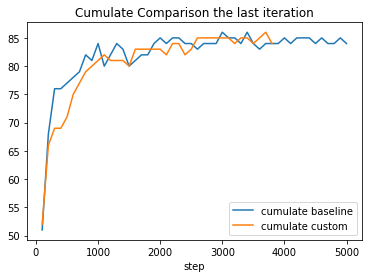

In [59]:
fig = plt.figure(figsize=(12,8))
plt.plot(cumulate_baseline[:,-1,1],cumulate_baseline[:,-1,-1],label = "cumulate baseline")
plt.plot(cumulate_experiment[:,-1,1],cumulate_experiment[:,-1,-1], label = "cumulate custom")
plt.legend()
plt.title("Cumulate Comparison the last iteration")
plt.xlabel("step")

Text(0.5,0,'step')

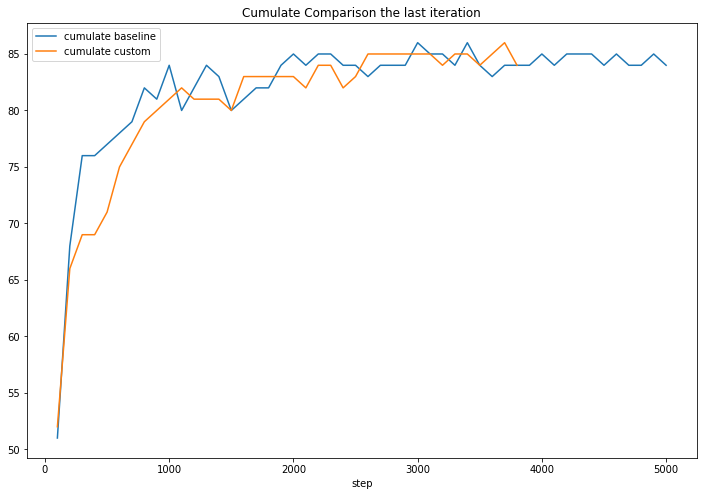

In [10]:
fig = plt.figure(figsize=(12,8))
plt.plot(cumulate_baseline[:,-1,1],cumulate_baseline[:,-1,-1],label = "cumulate baseline")
plt.plot(cumulate_experiment[:,-1,1],cumulate_experiment[:,-1,-1], label = "cumulate custom")
plt.legend()
plt.title("Cumulate Comparison the last iteration")
plt.xlabel("step")

Text(0,0.5,'accuracy')

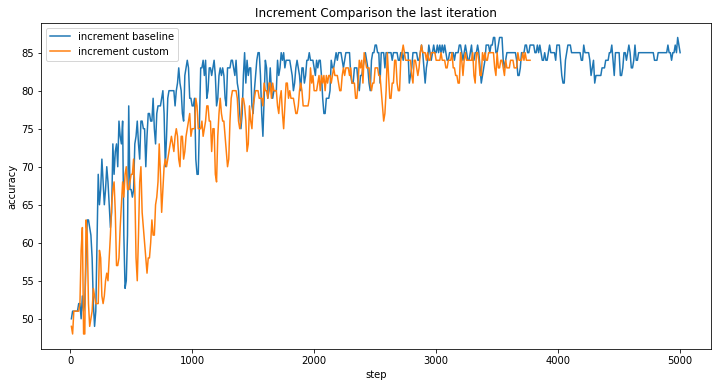

In [18]:
fig = plt.figure(figsize=(12,6))
increment_baseline1=increment_baseline.reshape((500,10,6))
increment_experiment1=increment_experiment.reshape((377,10,6))

plt.plot(increment_baseline1[:,-1,3],increment_baseline1[:,-1,-1],label = "increment baseline")
plt.plot(increment_experiment1[:,-1,3],increment_experiment1[:,-1,-1], label = "increment custom")
plt.legend()
plt.title("Increment Comparison the last iteration")
plt.xlabel("step")
plt.ylabel("accuracy")

Text(0,0.5,'accuracy')

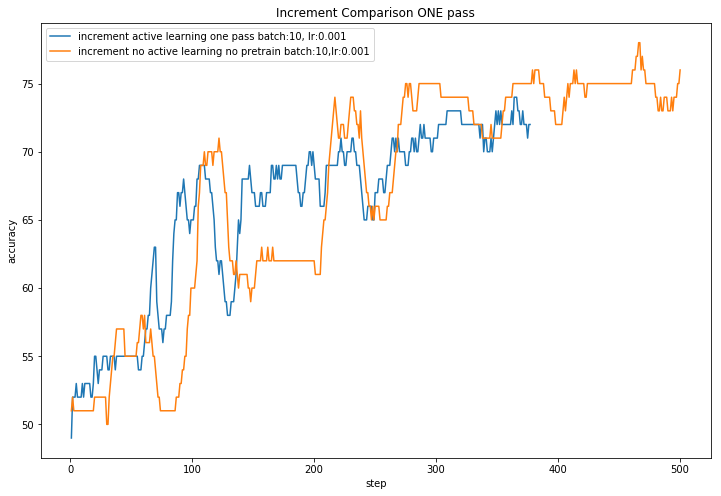

In [19]:
fig = plt.figure(figsize=(12,8))

plt.plot(increment_experiment_one_pass[:,3],increment_experiment_one_pass[:,-1], label = "increment active learning one pass batch:10, lr:0.001")
plt.plot(increment_baseline_one_pass[:,3],increment_baseline_one_pass[:,-1],label = "increment no active learning no pretrain batch:10,lr:0.001")

plt.legend()
plt.title("Increment Comparison ONE pass")
plt.xlabel("step")
plt.ylabel("accuracy")

## check data overlap

In [80]:
baseline_set = list(JSONL("/data/prodigy/data/IMDB_default/baseline_dataset_2000.jsonl"))
train_set = list(JSONL("/data/prodigy/data/IMDB_default/custom_vector_experiment.jsonl"))

In [85]:
overlap = 0
for train in train_set:
    for base in baseline_set:
        if train['text'] == base['text'] and train['label'] == base['label']:
            overlap +=1
            

In [89]:
if(overlap == len(train_set)):
    print("The train set is a subset of baseline set")

The train set is a subset of baseline set


## Cut evaluation dataset to 320 

In [18]:
eval_set = JSONL("/data/prodigy/data/IMDB_default/new_eval_dataset.jsonl")
eval_unique_set = JSONL("/data/prodigy/data/IMDB_default/unique_eval.jsonl")

In [7]:
eval_unique_list = list(eval_unique_set)

In [19]:
accept = []

for data in eval_set:
    if(data["answer"] == "accept" and data not in eval_unique_list):
        accept.append(data)

In [20]:
print(len(accept))

680


In [41]:
negative = []
for data in ac:
    if(data["label"] == "NEGATIVE"):
        negative.append(data)

In [42]:
len(negative)

166

In [19]:
import random

In [39]:
ac = random.sample(accept,320)

In [45]:
with open("/data/prodigy/data/IMDB_default/unique_eval.jsonl","w") as f:
    f.write("\n".join([json.dumps(j) for j in ac]))

In [21]:
with open("/data/prodigy/data/IMDB_default/rest_eval.jsonl","w") as f:
    f.write("\n".join([json.dumps(j) for j in accept]))